C:\Users\fongcw\AppData\Local\Temp\ipykernel_10504\1066062197.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('Distribution')


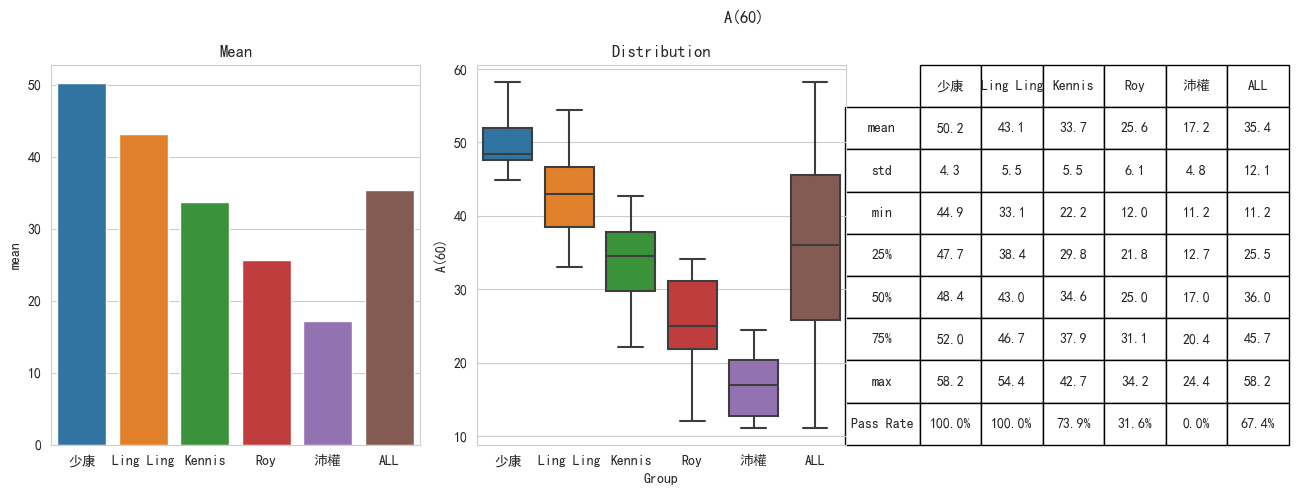

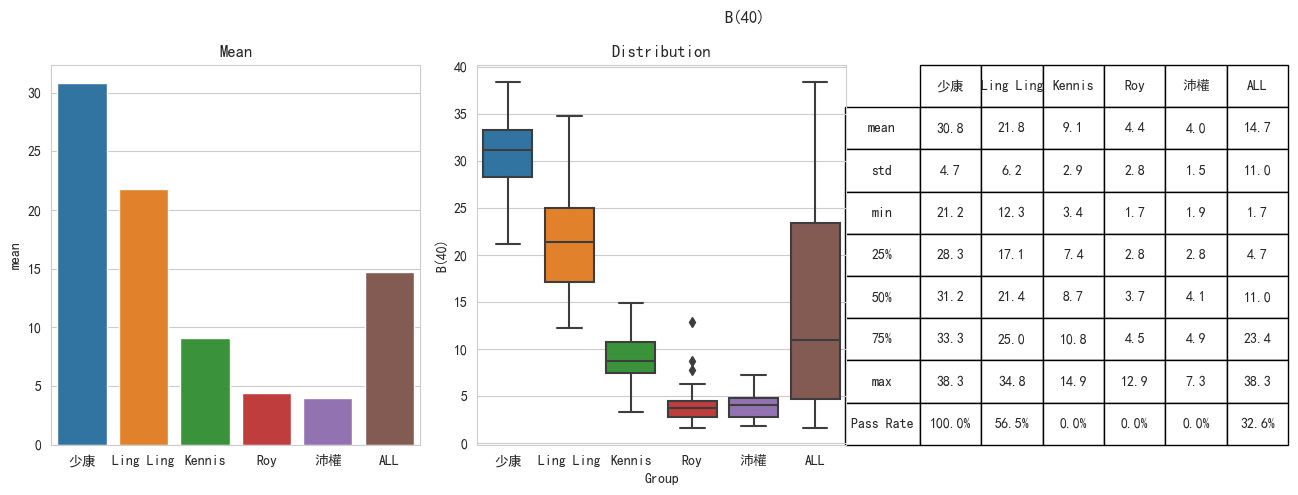

C:\Users\fongcw\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


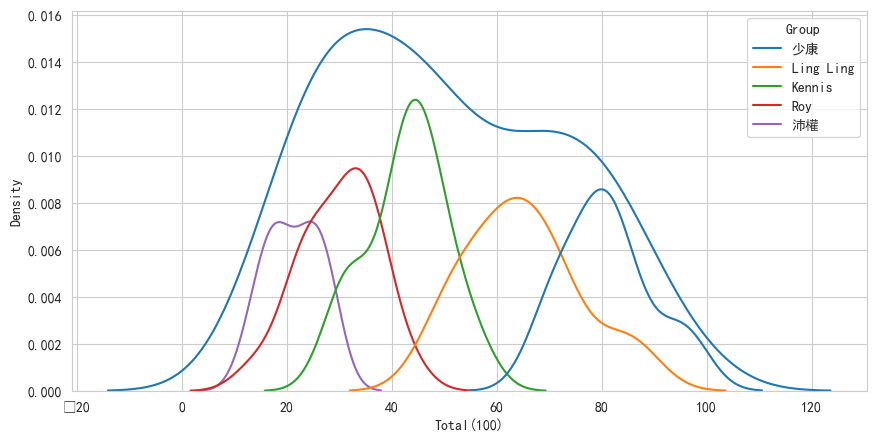

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import matplotlib as mpl
import openpyxl
from openpyxl import load_workbook
from openpyxl.drawing.image import Image  
from PIL import Image

form=input()
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("whitegrid",{"font.sans-serif":['simhei']})
df_dict = pd.read_excel(f'S.{form} mark_input_template for analysis.xlsx',sheet_name=None,skiprows=2)
all_sheets = []
for name, sheet in df_dict.items():
    sheet['Group'] = name.split('_')[-1]
    sheet = sheet.rename(columns=lambda x: x.split('\n')[-1])
    all_sheets.append(sheet)
df = pd.concat(df_dict.values())
df=df[~df["Name"].isnull()]
df=df.reset_index(drop=True)
df=df[['Class','NO','Name','A(60)','B(40)','Total(100)','Group']]
df=df[df['Total(100)']!=0]
df2=df.copy()
df2['Group']='ALL'
df = pd.concat([df,df2])
df
df['NO']=df['NO'].astype(int)
dit={'A(60)':30,'B(40)':20,'Total(100)':50}
for section,value in dit.items():
    table=pd.DataFrame()
    pass_rate=list()
    teacher=list(df.Group.unique())
    for _ in teacher:
        pass_rate.append(str(round(df.loc[(df.Group==_)&(df[section]>=value)]['Name'].count()/df[df.Group==_]['Name'].count()*100,1))+"%")
    for _ in teacher:
        table[_]=df[df.Group==_][section].describe()
    table['ALL']=df[section].describe()
    table=round(table,1)
    table=table.drop('count')
    table=table.transpose()
    table2=table
    table['Pass Rate']=pass_rate
    table=table.transpose()
    fig,axes=plt.subplots(1,2,figsize=(15, 5))
    fig.suptitle(section)
    sns.boxplot(data=df,y=section,x='Group',ax=axes[1])
    axes[0].set_title('Mean')
    sns.barplot(data=table2,x=table2.index,y='mean',ax=axes[0])
    axes[1].set_title('Distribution')
    tbl=plt.table(cellText=table.values,
          rowLabels=table.index,
          colLabels=table.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='right',bbox = [1.2, 0, 1, 1])
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    plt.tight_layout()
    plt.savefig(section)
    with pd.ExcelWriter('output.xlsx',engine="openpyxl",mode='a',if_sheet_exists='replace') as writer:  
        table.to_excel(writer, sheet_name=section)
image1 = Image.open('{}.png'.format(list(dit.keys())[0]))
for _ in list(dit.keys())[1:]:
    image2 = Image.open('{}.png'.format(_))
    image1_size = image1.size
    image2_size = image2.size
    new_image = Image.new('RGB',(image1_size[0], image1_size[1]+image2_size[1]), (250,250,250))
    new_image.paste(image1,(0,0))
    new_image.paste(image2,(0,image1_size[1]))
    new_image.save(f"output{form}.png","PNG")
    image1=new_image


plt.clf()
sns.kdeplot(data=df2,x='Total(100)',hue='Group')
sns.kdeplot(data=df[df.Group!='ALL'],x='Total(100)',hue='Group')
plt.savefig('Distribution')
plt.show()
